# Tutorial 1: Number of cells vs time
**NOTE:** This tutorials works with the **R18Demo.ims** dataset. You will also need to create some spot data.

Create a new spot object in Imaris, and just use the defaults until you reach the end of the spots creation wizard.

![Tracks](tut1_tracks.jpg)

In [1]:
%reload_ext XTIPython
import numpy as np

## Spots magic
I wrote an %imaris_pull shortcut to pull spots, cells, filaments and surfaces. Typing the following create a spots dictionary with spot objects names as keys and the ISpots objects as values. The spots names are displayed after completion of the magic command.

In [2]:
%imaris_pull spots

['Spots 1']

In [3]:
sv = spots.values()[0] #We should only have one ISPots object in the dictionary, so let's pull it.

## Spots calculation using numpy functions

The spots returned from Imaris are associated with a unique timepoint. This data is returned by sv.GetIndicesT().

Counting the number of instances for each timepoint gives the "number of cells vs time" data we are after.

We can do this through a loop, or there is a numpy function we can use to do this. np.unique() counts the unique number of instances in an array:

In [4]:
tpindexes, nspots = np.unique(sv.GetIndicesT(), return_counts=True)

If we want to display the actual timepoints instead of their indexes, there's a way to do this using BridgeLib (timepoints returned in second, starting from 0):

In [5]:
tps = BridgeLib.GetTimepoints(vDataSet,tpindexes)
print tps

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.]


**NOTE:** In this case, the timepoints are separated by exactly 1s, this may not always be the case!

## Plotting the data

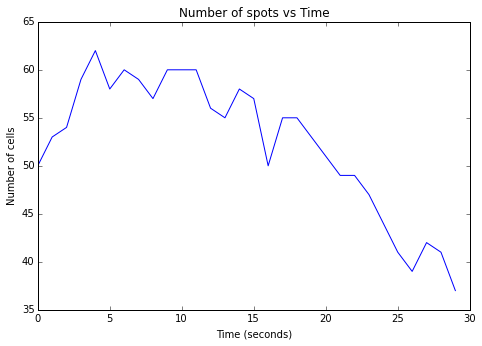

In [6]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.plot(tps,nspots)
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Number of cells')
ax.set_title('Number of spots vs Time')